In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def normalize_string_column_values(df, column_name):
    df[column_name] = df[column_name].str.upper()
    df[column_name] = df[column_name].str.strip()
    return df

In [18]:
items = pd.read_csv('data/order_items.csv')
items = items.drop(columns=['Unnamed: 0'])
items["discount_amount"] = items["discount_amount"].fillna(0)
items["has_discount"] = items["discount_amount"] > 0
products = pd.read_csv('data/products.csv')
products = products.drop(columns=['created_at', 'Unnamed: 0'])
categories = pd.read_csv('data/categories.csv')
categories = categories.drop(columns=['created_at', 'Unnamed: 0'])

In [19]:
normalize_string_column_values(products, 'product_name')
normalize_string_column_values(products, 'brand')
normalize_string_column_values(categories, 'category_name')
normalize_string_column_values(categories, 'parent_category')
items = items.merge(products[["product_id", "product_name", "category_id"]], on="product_id", how="left")
items = items.merge(categories, on="category_id", how="left")

In [20]:
items.product_id.value_counts().describe()

count    94118.000000
mean         3.030696
std          1.582374
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: count, dtype: float64

In [ ]:
items_grouped = items.groupby(["parent_category", "category_name"]).agg({
    "product_id": ["nunique", "count"],
    "quantity": ["count", "mean"]
}).reset_index()

items_grouped.columns = [
    'Categoría padre',
    'Categoría',
    'Productos únicos',
    'Cantidad de ordenes',
    'Unidades totales ordenadas',
    'Promedio de unidades ordenadas'
]

items_grouped.nlargest(10, columns="Unidades totales ordenadas")
items_grouped.describe()


,index,Productos únicos,Cantidad de ordenes,Unidades totales ordenadas,Promedio de unidades ordenadas
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,75.500000,525.315789,1591.263158,1352.361842,5.527958
std,44.022721,20.755091,75.946630,66.867225,0.085510
min,0.000000,486.000000,1420.000000,1217.000000,5.317549
25%,37.750000,511.750000,1538.250000,1310.250000,5.479568
50%,75.500000,523.000000,1589.500000,1351.000000,5.529065
75%,113.250000,538.000000,1636.250000,1391.000000,5.583063
max,151.000000,590.000000,1828.000000,1574.000000,5.778549


In [22]:
items_grouped

,index,Categoría padre,Categoría,Productos únicos,Cantidad de ordenes,Unidades totales ordenadas,Promedio de unidades ordenadas
0,0,ART & CRAFTS,BEADING,522,1645,1405,5.616370
1,1,ART & CRAFTS,CANVAS & PAPER,558,1728,1463,5.435407
2,2,ART & CRAFTS,DRAWING SUPPLIES,500,1536,1300,5.564615
3,3,ART & CRAFTS,PAINTS,544,1661,1436,5.317549
4,4,ART & CRAFTS,PAPER CRAFTS,517,1564,1333,5.558140
...,...,...,...,...,...,...,...
147,147,TRAVEL,TRAVEL ACCESSORIES,508,1563,1313,5.475248
148,148,TRAVEL,TRAVEL CLOTHING,488,1420,1217,5.514380
149,149,UNDEFINED,NON-FICTION,510,1512,1273,5.643362
150,150,UNDEFINED,SNACKS,539,1627,1385,5.415884


In [29]:
data = items_grouped.groupby("Categoría padre").agg({
    "Productos únicos": "sum",
    "Cantidad de ordenes": "sum",
    "Unidades totales ordenadas": "sum"
}).reset_index()
data

,Categoría padre,Productos únicos,Cantidad de ordenes,Unidades totales ordenadas
0,ART & CRAFTS,2641,8134,6937
1,AUTOMOTIVE,2017,6036,5141
2,BABY & KIDS,2575,7700,6558
3,BOOKS,2696,8216,7003
4,CLOTHING,2096,6322,5335
5,COLLECTIBLES,2664,8082,6812
6,ELECTRONICS,2109,6383,5416
7,FOOD & BEVERAGES,2055,6195,5284
8,FURNITURE,3177,9697,8243
9,GAMES & VIRTUAL GOODS,3200,9697,8282


Text(0.5, 1.0, 'Cantidad de ordenes por categoría padre')

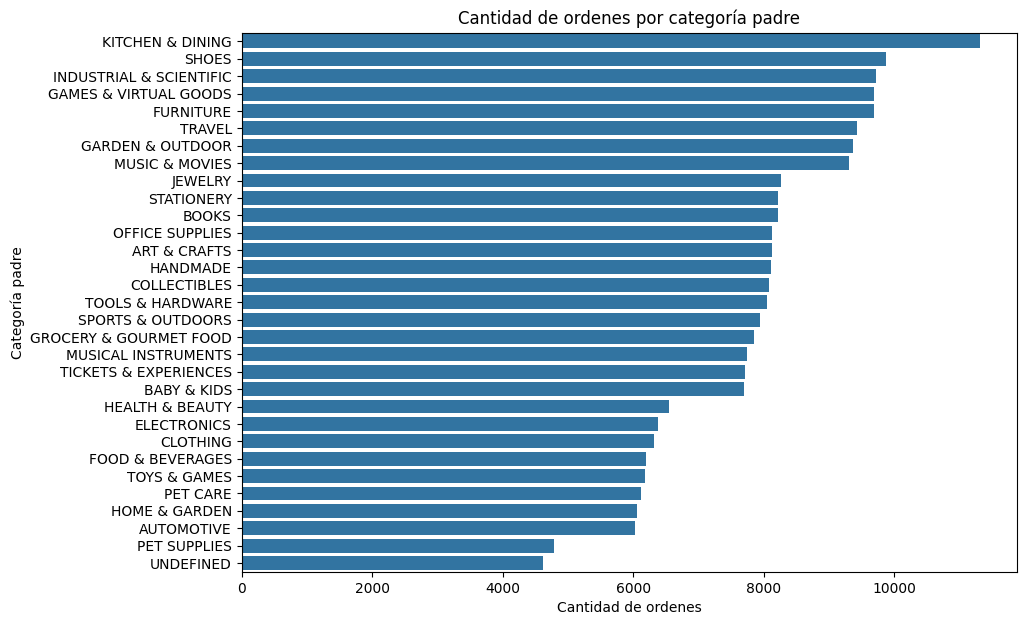

In [34]:
plt.figure(figsize=[10, 7])
sns.barplot(
    data=data[["Categoría padre","Cantidad de ordenes"]]\
        .sort_values("Cantidad de ordenes", ascending=False),
    y="Categoría padre", x="Cantidad de ordenes",
)
plt.title("Cantidad de ordenes por categoría padre")

Text(0.5, 1.0, 'Unidades ordenadas por categoría padre')

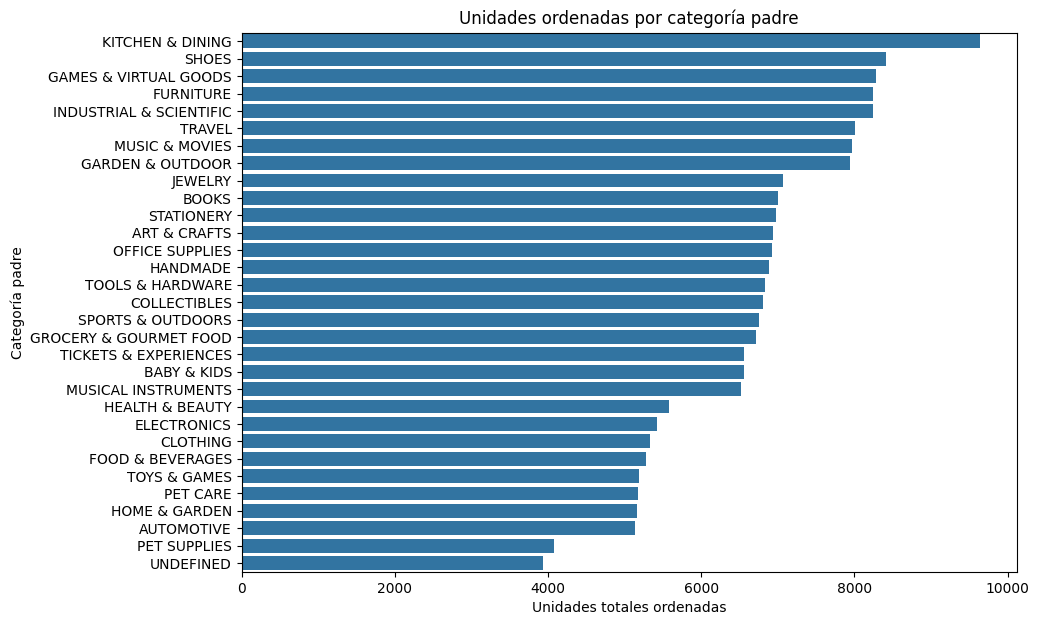

In [35]:
plt.figure(figsize=[10, 7])
sns.barplot(
    data=data[["Categoría padre","Unidades totales ordenadas"]]\
        .sort_values("Unidades totales ordenadas", ascending=False),
    y="Categoría padre", x="Unidades totales ordenadas",
)
plt.title("Unidades ordenadas por categoría padre")

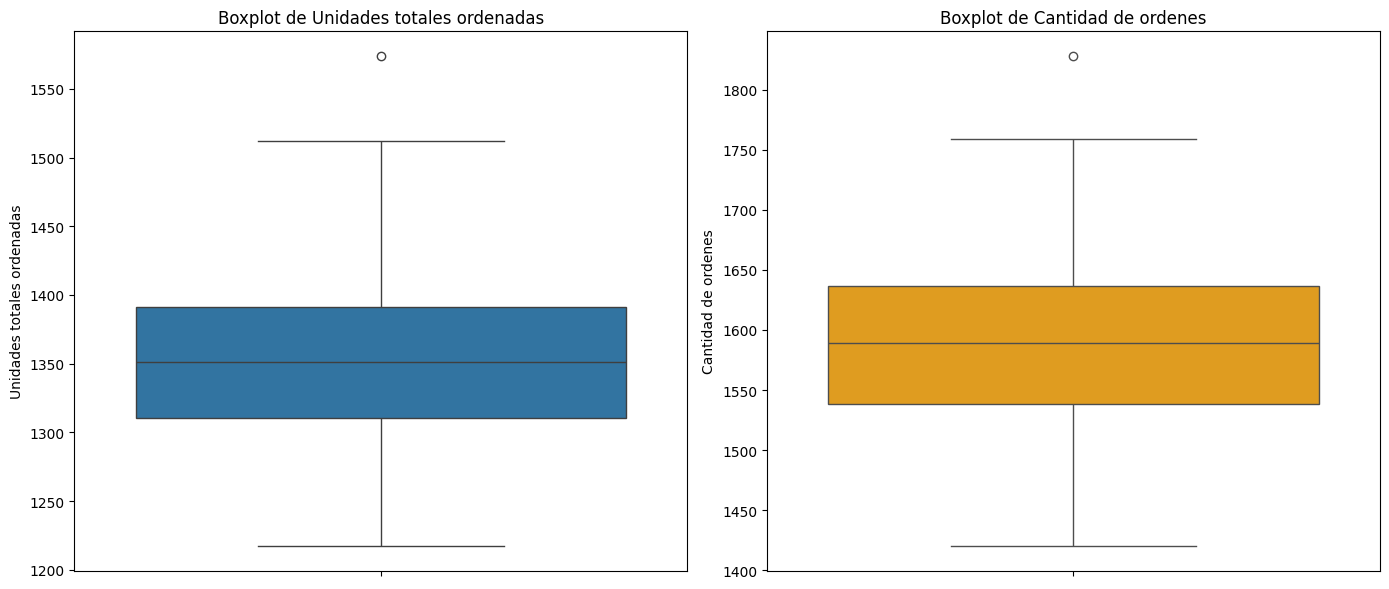

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=items_grouped["Unidades totales ordenadas"].dropna())
plt.title("Boxplot de Unidades totales ordenadas")
plt.ylabel("Unidades totales ordenadas")

plt.subplot(1, 2, 2)
sns.boxplot(y=items_grouped["Cantidad de ordenes"].dropna(), color="orange")
plt.title("Boxplot de Cantidad de ordenes")
plt.ylabel("Cantidad de ordenes")

plt.tight_layout()